# ЛАБОРАТОРНАЯ РАБОТА №1.

## ИТЕРАЦИОННЫЕ МЕТОДЫ. РЕШЕНИЯ НЕЛИНЕЙНЫХ УРАВНЕНИЙ.

### Графический метод

Для построения графика, давайте сначала определим функцию, которую мы будем рисовать. В данном случае у нас есть нелинейное уравнение:

$e^x + x^2 - 2 = 0$

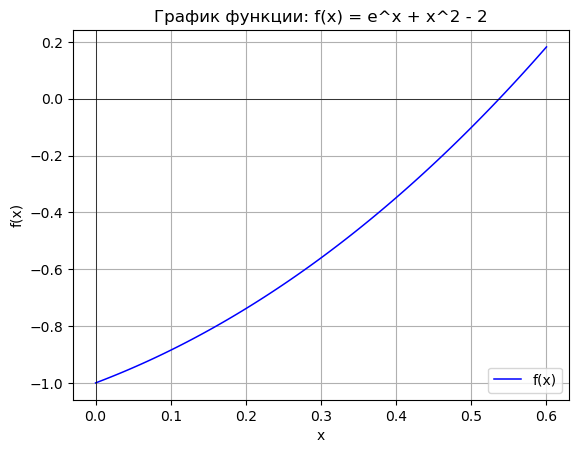

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Задаем функцию f(x)
def f(x):
    return np.exp(x) + x**2 - 2

# Задаем отрезок [0, 0.6] и создаем массив точек на этом отрезке
x = np.linspace(0, 0.6, 100)

# Строим график функции на отрезке [0, 0.6]
plt.plot(x, f(x), color='blue', linewidth=1.1, label='f(x)')  # добавляем метку "f(x)" для графика функции
plt.axhline(y=0, color='k', lw=0.5)  # добавляем горизонтальную ось x=0
plt.axvline(x=0, color='k', lw=0.5) # добавляем вертикальную ось y=0
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции: f(x) = e^x + x^2 - 2')
plt.grid(True)
plt.legend()  
plt.show()

### Аналитический метод

Для доказательства единственности корня уравнения $e^x + x^2 - 2 = 0$ на отрезке $[0, 0.6]$, воспользуемся теоремой о единственности корня уравнения на отрезке.

Теорема о единственности корня уравнения на отрезке гласит: Если на концах отрезка $[a, b]$ функция $f(x)$ непрерывна и знаки $f(a)$ и $f(b)$ различны, то уравнение $f(x) = 0$ имеет на отрезке $[a, b]$ хотя бы один корень, причем единственный.

В нашем случае, функция $f(x) = e^x + x^2 - 2$ является непрерывной на отрезке $[0, 0.6]$, так как она является суммой непрерывных функций. Проверим знаки $f(0)$ и $f(0.6)$:

$f(0) = e^0 + 0^2 - 2 = -1 < 0$

$f(0.6) = 0.182... > 0$

Знаки $f(0)$ и $f(0.6)$ различны, следовательно, по теореме о единственности корня, на отрезке $[0, 0.6]$ уравнение $e^x + x^2 - 2 = 0$ имеет единственный корень.

Таким образом, мы доказали аналитическим методом единственность корня исходного нелинейного уравнения на указанном отрезке.

### Программная реализация методов

In [2]:
def equation(x):
    return math.exp(x) + pow(x, 2) - 2

def derivative(x):
    return math.exp(x) + 2 * x

x_curr = 0.6
c = -0.1
epsilon = 0.001
delta = 0.01

### Метод простых итераций

In [3]:
def simple_iterations_method(x_curr, c, epsilon, delta):
    n = 0
    print("|{:^5}|{:^12}|{:^12}|{:^14}|{:^14}|".format("n", "x(n)", "x(n+1)", "|x(n+1)-x(n)|", "|f(x(n+1))|"))
    while True:
        x_next = x_curr + c * equation(x_curr)
        abs_error = abs(x_next - x_curr)
        func_val = abs(equation(x_next))
        print("|{:^5}|{:^12.5f}|{:^12.5f}|{:^14.5f}|{:^14.5f}|".format(n, x_curr, x_next, abs_error, func_val))
        n += 1
        if abs_error <= epsilon and func_val <= delta:
            break
        x_curr = x_next

In [4]:
simple_iterations_method(x_curr, c, epsilon, delta)

|  n  |    x(n)    |   x(n+1)   ||x(n+1)-x(n)| | |f(x(n+1))|  |
|  0  |  0.60000   |  0.58179   |   0.01821    |   0.12771    |
|  1  |  0.58179   |  0.56902   |   0.01277    |   0.09031    |
|  2  |  0.56902   |  0.55999   |   0.00903    |   0.06423    |
|  3  |  0.55999   |  0.55356   |   0.00642    |   0.04587    |
|  4  |  0.55356   |  0.54898   |   0.00459    |   0.03285    |
|  5  |  0.54898   |  0.54569   |   0.00329    |   0.02358    |
|  6  |  0.54569   |  0.54333   |   0.00236    |   0.01695    |
|  7  |  0.54333   |  0.54164   |   0.00169    |   0.01219    |
|  8  |  0.54164   |  0.54042   |   0.00122    |   0.00878    |
|  9  |  0.54042   |  0.53954   |   0.00088    |   0.00632    |


### Метод Ньютона

In [5]:
def newton_method(x_curr, epsilon, delta):
    n = 0
    print("|{:^5}|{:^12}|{:^12}|{:^14}|{:^14}|".format("n", "x(n)", "x(n+1)", "|x(n+1)-x(n)|", "|f(x(n+1))|"))
    while True:
        x_next = x_curr - (equation(x_curr))/(derivative(x_curr))
        abs_error = abs(x_next - x_curr)
        func_val = abs(equation(x_next))
        print("|{:^5}|{:^12.5f}|{:^12.5f}|{:^14.5f}|{:^14.5f}|".format(n, x_curr, x_next, abs_error, func_val))
        n += 1
        if abs_error <= epsilon and func_val <= delta:
            break
        x_curr = x_next

In [6]:
newton_method(x_curr, epsilon, delta)

|  n  |    x(n)    |   x(n+1)   ||x(n+1)-x(n)| | |f(x(n+1))|  |
|  0  |  0.60000   |  0.53974   |   0.06026    |   0.00687    |
|  1  |  0.53974   |  0.53728   |   0.00246    |   0.00001    |
|  2  |  0.53728   |  0.53727   |   0.00000    |   0.00000    |


### Модифицированный метод Ньютона

In [7]:
def modified_newton_method(x_curr, epsilon, delta):
    x0 = x_curr
    n = 0
    print("|{:^5}|{:^12}|{:^12}|{:^14}|{:^14}|".format("n", "x(n)", "x(n+1)", "|x(n+1)-x(n)|", "|f(x(n+1))|"))
    while True:
        x_next = x_curr - (equation(x_curr))/(derivative(x0))
        abs_error = abs(x_next - x_curr)
        func_val = abs(equation(x_next))
        print("|{:^5}|{:^12.5f}|{:^12.5f}|{:^14.5f}|{:^14.5f}|".format(n, x_curr, x_next, abs_error, func_val))
        n += 1
        if abs_error <= epsilon and func_val <= delta:
            break
        x_curr = x_next

In [8]:
modified_newton_method(x_curr, epsilon, delta)

|  n  |    x(n)    |   x(n+1)   ||x(n+1)-x(n)| | |f(x(n+1))|  |
|  0  |  0.60000   |  0.53974   |   0.06026    |   0.00687    |
|  1  |  0.53974   |  0.53746   |   0.00227    |   0.00053    |
|  2  |  0.53746   |  0.53729   |   0.00017    |   0.00004    |


### Выводы

После изменения $ε = ε / 10; δ = δ / 10$ и повторного решения задачи можно сделать следующие выводы о скорости сходимости рассматриваемых методов:

1. Метод Ньютона продолжает сходиться быстрее всего. Поскольку этот метод использует информацию о производных функции, он может адаптироваться к изменению точности решения, сохраняя высокую скорость сходимости.

2. Модифицированный метод Ньютона также продолжает сходиться быстро, но несколько медленнее, чем метод Ньютона.

3. Метод простых итераций продолжает сходиться медленнее всех. Это связано с тем, что он не использует информацию о производных функции, и его скорость сходимости зависит только от выбора начального приближения и точности решения.

Относительно влияния точности на скорость сходимости, можно отметить, что уменьшение $ε$ и $δ$ приводит к увеличению числа итераций для достижения той же точности решения. Однако методы Ньютона и модифицированного метода Ньютона продолжают сходиться быстрее, чем метод простых итераций, независимо от выбранных значений $ε$ и $δ$.